# MMI 701: Multimedia Signal Processing
## Frequency-domain analysis of LTI systems

- Let us first import the modules that we will need to use in the notebook.

In [74]:
import numpy as np
import scipy.signal as spsig
import matplotlib.pyplot as plt

## Analysing a system with a known impulse reponse

- We will first define an impulse response and then analyse it in the frequency domain and then plot its samples as a stem plot

Text(0,0.5,'$h(n)$')

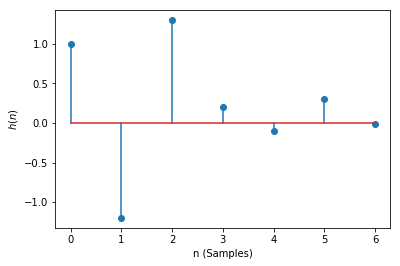

In [75]:
hn = np.array([1., -1.2, 1.3, 0.2, -0.1, 0.3, -0.01])
plt.stem(hn)
plt.xlabel("n (Samples)")
plt.ylabel("$h(n)$")

- We will now use ```scipy.signal.freqz()``` function which is equivalent to the similar MATLAB function to calculate the frequency response.
- We will calculate the whole spectrum from $\omega=0$ to $\omega=2\pi$. Since the impulse response is real valued, mannitude response will be an even periodic function around $\omega=\pi$ while phase response will be an odd pediodic function
- Notice also that ```np.angle()```provides the wrapped phase which needs to be **unwrapped** to make better sense. We also calculate that using ```np.unwrap()``` and plot.

Text(0,0.5,'Phase response [rad]')

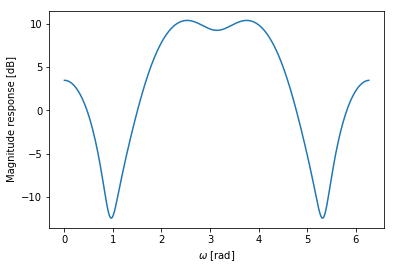

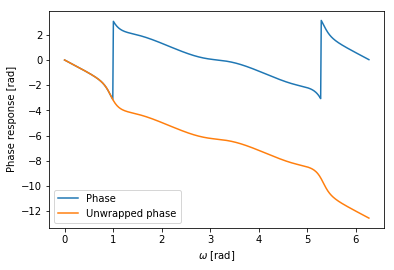

In [76]:
w, H = spsig.freqz(hn, whole=True)
plt.plot(w, 10*np.log10(np.abs(H)**2))
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Magnitude response [dB]')
plt.figure()
plt.plot(w, np.angle(H), label='Phase')
plt.plot(w, np.unwrap(np.angle(H)), label='Unwrapped phase')
plt.legend()
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Phase response [rad]')

## Poles and Zeroes of a System

- We will now plot the poles and zeroes which we will define. This is just to show how you can use the ```np.polar()``` function. That is again very similar to polar plot in MATLAB
- For the Python version, we need to input arrays of phase and radius of the poles.

(0, 1)

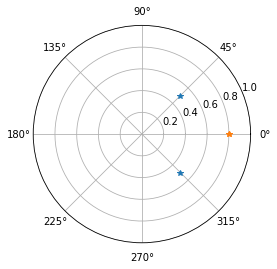

In [77]:
z1 = 0.8 
z2 = 0.8
p1 = 0.5 * np.exp(1j*np.pi/4)
p2 = np.conj(p1)
thp = np.angle([p1, p2])
thz = np.angle([z1, z2])
rp = np.abs([p1, p2])
rz = np.abs([z1, z2])

plt.polar(thp, rp, '*')
plt.polar(thz, rz, '*')
plt.ylim(0,1)

## Digital Resonator

- We will now define three different digital resonators with poles progressively getting colesr to the unit circle
- Remember that in order to have a stable and causal IIR system the poles have to be within the unit circle
- We will use three radii: $0.75$, $0.85$ and $0.95$. Observe that the resonant peak gets sharper and the 3 dB bandwidth decreases with increasing pole radii
- We will now use ```scipy.signal.freqz_zpk()``` which accepts zeros and poles as input and is slightly more convenient for this example.

Text(0,0.5,'Magnitude response [dB]')

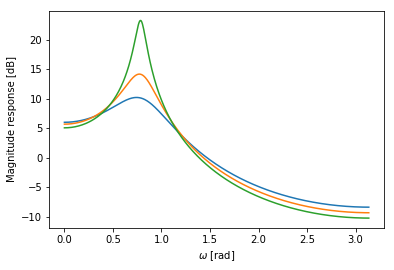

In [78]:
p1 = 0.75 * np.exp(1j*np.pi/4)
p2 = np.conj(p1)
w, H = spsig.freqz_zpk([],[p1, p2], 1, whole=False)
plt.plot(w, 10*np.log10(np.abs(H)**2))
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Magnitude response [dB]')

p1 = 0.85 * np.exp(1j*np.pi/4)
p2 = np.conj(p1)
w, H = spsig.freqz_zpk([],[p1, p2], 1, whole=False)
plt.plot(w, 10*np.log10(np.abs(H)**2))
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Magnitude response [dB]')

p1 = 0.95 * np.exp(1j*np.pi/4)
p2 = np.conj(p1)
w, H = spsig.freqz_zpk([],[p1, p2], 1, whole=False)
plt.plot(w, 10*np.log10(np.abs(H)**2))
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Magnitude response [dB]')

## Notch Filters

- We will now design a notch filter with a single pair of zeros at a frequency of $F_{\textrm{notch}}=5F_s/12$. For example if the sampling rate were 48 kHz, the notch would be at 20 kHz
- For that we create a pair of complex conjugate zeros and use ```scipy.signal.freqz_zpk()``` to obtain the frequency response.
- Observe the position of the notch.

Text(0,0.5,'Magnitude response [dB]')

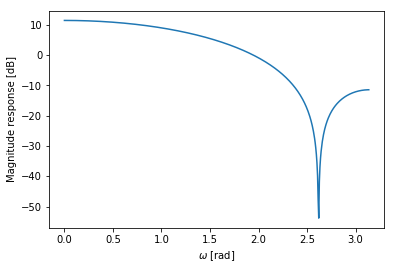

In [79]:
z1 = np.exp(1j*5*np.pi/6)
z2 = np.conj(z1)
w, H = spsig.freqz_zpk([z1, z2], [], 1, whole=False)
plt.plot(w, 10*np.log10(np.abs(H)**2))
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Magnitude response [dB]')

- Let us now create a signal which contains two frequencies 100 Hz and 20 kHz and see if the notch filter can eliminate the latter

Text(0,0.5,'Amplitude')

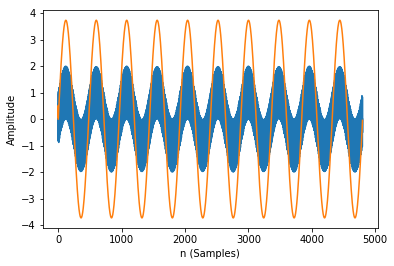

In [80]:
t = np.linspace(0, 0.1, 4800)
Fs = 48000.
T = 1/Fs
n = t/T
F1, F2 = 100, 20000
sig1 = np.sin(2 * np.pi * F1 / Fs * n)
sig2 = np.sin(2 * np.pi * F2 / Fs * n)
sig = sig1 + sig2
out = spsig.lfilter(np.poly([z1, z2]), 1, sig)
plt.plot(n, sig, label = 'Input')
plt.plot(n, out, label = 'Output')
plt.xlabel('n (Samples)')
plt.ylabel('Amplitude')

- As we would expect, the high-frequency component is totally eliminated

## Comb Filter

- Let us now design and test a comb filter.
- For the sake of this example we will have an $M=10$ order Comb filter
- Notice how we define the numerator and denominator polynomials
- Let us first calculate the roots of these polynomials and plot them

(0, 1.1)

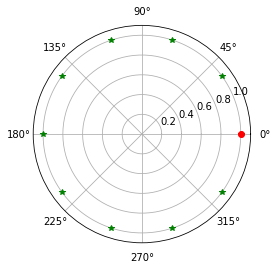

In [81]:
M = 10
B = np.zeros(M+1)
B[0], B[M] = 1, -1
A = np.array([1, -1])
poles = np.roots(A)
zeros = np.roots(B)
thp = np.angle(poles)
thz = np.angle(zeros)
rp = np.abs(poles)
rz = np.abs(zeros)

plt.polar(thz, rz, 'g*')
plt.polar(thp, rp, 'ro')
plt.ylim(0,1.1)

- Observe that the pole at $\omega=0$ coincides with a zero that the same position, cancelling it. We are left with 9 zeroes.

Text(0,0.5,'Magnitude response [dB]')

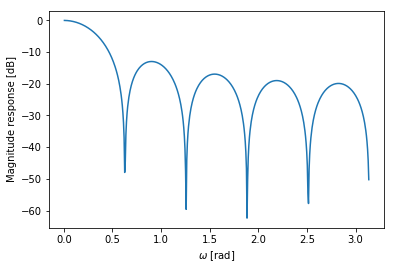

In [82]:
w, H = spsig.freqz_zpk(zeros, poles, 0.1)
plt.plot(w, 10*np.log10(np.abs(H)**2))
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Magnitude response [dB]')

## Allpass Filters

- We will now design an arbitrary allpass filter with zeroes and poles at reciprocal positions.
- We will first plot a pole-zero diagram

(0, 1.5)

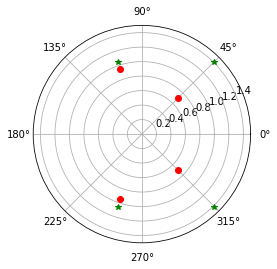

In [83]:
poles = np.array([.5+0.5j, .5-0.5j, -.3+0.9j, -.3-0.9j])
zeros = 1/poles
A = np.poly(poles)
B = A[-1::-1] # Mirror of the polynomial

thp = np.angle(poles)
thz = np.angle(zeros)
rp = np.abs(poles)
rz = np.abs(zeros)

plt.polar(thz, rz, 'g*')
plt.polar(thp, rp, 'ro')
plt.ylim(0,1.5)

- Let us now calculate and plot the magnitude and the phase responses

Text(0,0.5,'Phase response [rad]')

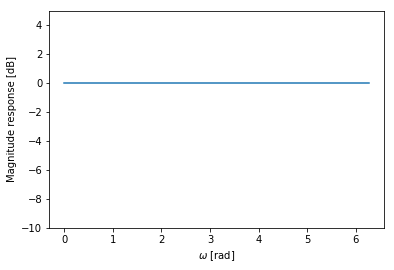

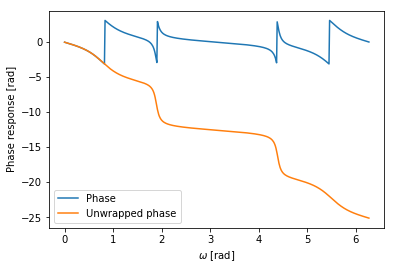

In [84]:
w, H = spsig.freqz(B, A, whole=True)
plt.plot(w, 10*np.log10(np.abs(H)**2))
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Magnitude response [dB]')
plt.ylim(-10, 5)
plt.figure()
plt.plot(w, np.angle(H), label='Phase')
plt.plot(w, np.unwrap(np.angle(H)), label='Unwrapped phase')
plt.legend()
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Phase response [rad]')

- Although we will not cover that in this course, one interesting problem that allpass filters can be used is the emulation of fractional delays. For that we design what is called a **Thiran filter** which has a *maximally-flat phase delay*.
- Allpass filters can also be used in artificial reverberators that emulate room acoustic responses. Namely, they are used to increase the reflection density of articificial reverberators as in Schroeder reverberator.

## Digital Oscillator

- Let us now move the poles onto the unit circle and design a critically stable system which will act as a digital oscillator
- We will excite that using a discrete impulse and observe how it generates a sinusoid

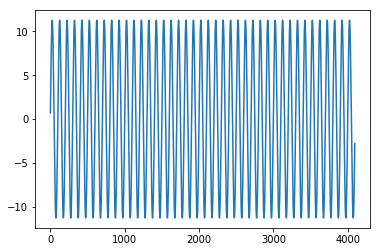

In [85]:
poles = np.array([np.exp(-1j*np.pi/50), np.exp(1j*np.pi/50)])
b0 = np.sin(np.pi/4)
inpt = np.zeros(4096)
inpt[0] = 1
outp = spsig.lfilter(np.array([b0]), np.poly(poles), inpt)
plt.plot(outp)

## Minimum/Maximum/Mixed-phase systems

- These types of filters have distinct uses in different problems in multimedia signal processing. For example, if you want to control the magnitude response of a filter while you want is to provide minimum delay you use a minimum-phase filter. One area that minimum-phase filters are used is in immersive, binaural audio synthesis.
- We will design a minimum-phase and a maximum-phase filter and observe their phase responses
- First: a minimum phase FIR filter where all zeroes are within the unit circle

(0, 1)

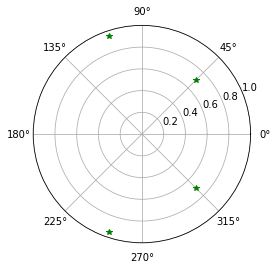

In [86]:
zeroes1 = np.array([.5+0.5j, .5-0.5j, -.3+0.9j, -.3-0.9j])
thz = np.angle(zeroes1)
rz = np.abs(zeroes1)
plt.polar(thz, rz, 'g*')
plt.ylim(0,1)

Text(0,0.5,'Phase response [rad]')

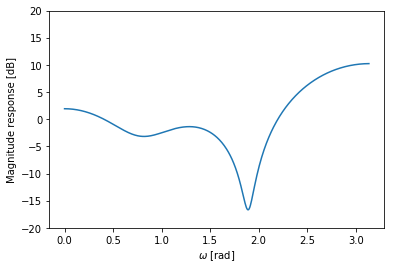

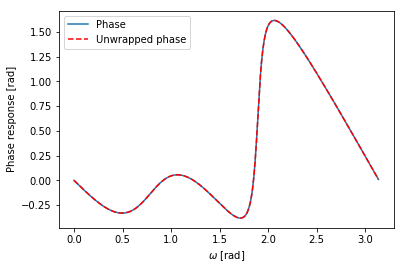

In [87]:
w, H = spsig.freqz(np.poly(zeroes1), 1)
plt.plot(w, 10*np.log10(np.abs(H)**2))
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Magnitude response [dB]')
plt.ylim(-20, 20)
plt.figure()
plt.plot(w, np.angle(H), label='Phase')
plt.plot(w, np.unwrap(np.angle(H)), 'r--', label='Unwrapped phase')
plt.legend()
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Phase response [rad]')

- Observe that the unwrapped and wrapped phases are equal since, the phase response never exceeds $\pi$ or goes below $-\pi$
- Also observe that the net phase difference from $0$ to $\pi$ is zero.
- Let us now position all zeroes outside the unit circle so that we have a maximum-phase response

Text(0,0.5,'Phase response [rad]')

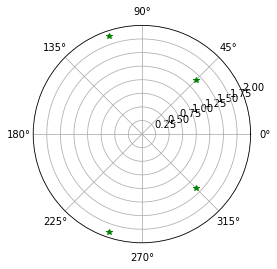

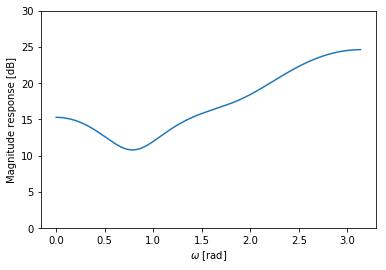

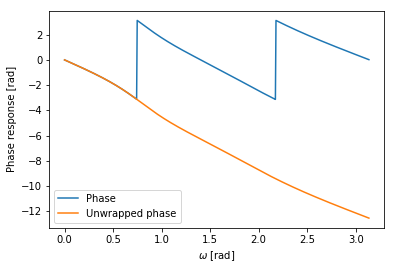

In [88]:
zeroes2 = np.array([.5+0.5j, .5-0.5j, -.3+0.9j, -.3-0.9j]) * 2
thz = np.angle(zeroes2)
rz = np.abs(zeroes2)
plt.polar(thz, rz, 'g*')
plt.ylim(0,2)

w, H = spsig.freqz(np.poly(zeroes2), 1)
plt.figure()
plt.plot(w, 10*np.log10(np.abs(H)**2))
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Magnitude response [dB]')
plt.ylim(0, 30)
plt.figure()
plt.plot(w, np.angle(H), label='Phase')
plt.plot(w, np.unwrap(np.angle(H)), label='Unwrapped phase')
plt.legend()
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Phase response [rad]')

- Observe that the phase response wraps around twice in $0\leq{}\omega\leq{}\pi$ (or $M=4$ times in $0\leq{}\omega\leq{}2\pi$)
- We will now design a mixed-phase filter combining zeroes of the original minimum- and maximum-phase filters

Text(0,0.5,'Phase response [rad]')

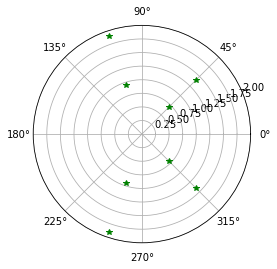

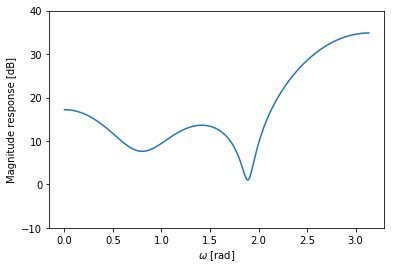

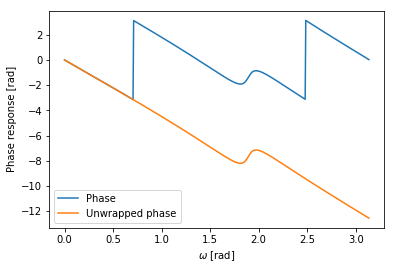

In [89]:
mixzeroes = np.append(zeroes1, zeroes2)
thz = np.angle(mixzeroes)
rz = np.abs(mixzeroes)
plt.polar(thz, rz, 'g*')
plt.ylim(0,2)

w, H = spsig.freqz(np.poly(mixzeroes), 1)
plt.figure()
plt.plot(w, 10*np.log10(np.abs(H)**2))
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Magnitude response [dB]')
plt.ylim(-10, 40)
plt.figure()
plt.plot(w, np.angle(H), label='Phase')
plt.plot(w, np.unwrap(np.angle(H)), label='Unwrapped phase')
plt.legend()
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Phase response [rad]')

- We will now design a special type of mixed-phase filter which is of great importance in signal processing.
- **Linear phase** FIR filters contain zeros not only at complex-conjugate positions but also their reciprocal positions.
- Don't worry about the magnitude response which is rather useless since we had done nothing about it (we will
 in a couple of weeks). However, observe the phase response.

Text(0,0.5,'Phase response [rad]')

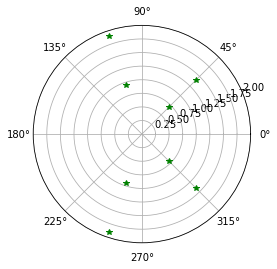

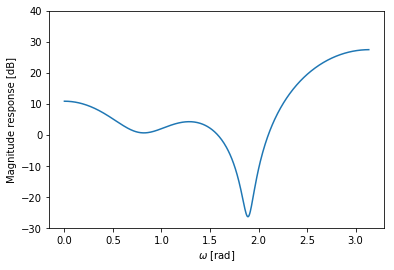

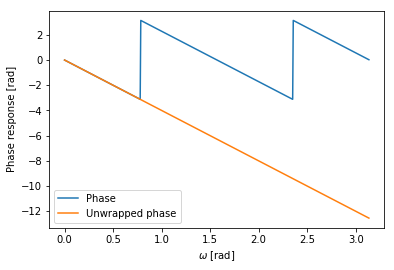

In [90]:
linzeroes = np.append(zeroes1, 1/zeroes1)
thz = np.angle(mixzeroes)
rz = np.abs(mixzeroes)
plt.polar(thz, rz, 'g*')
plt.ylim(0,2)

w, H = spsig.freqz(np.poly(linzeroes), 1)
plt.figure()
plt.plot(w, 10*np.log10(np.abs(H)**2))
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Magnitude response [dB]')
plt.ylim(-30, 40)
plt.figure()
plt.plot(w, np.angle(H), label='Phase')
plt.plot(w, np.unwrap(np.angle(H)), label='Unwrapped phase')
plt.legend()
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Phase response [rad]')

- The unwrapped phase looks very much linear, but is it, really?
- Let us also plot the group delay of this filter and see that the filter indeed has a linear group delay

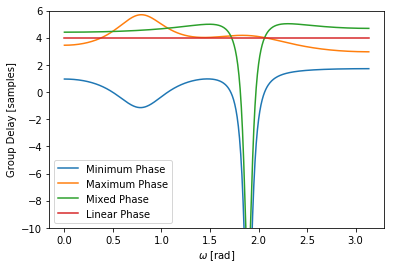

In [100]:
w, gdlymin = spsig.group_delay((np.poly(zeroes1), 1))
w, gdlymax = spsig.group_delay((np.poly(zeroes2), 1))
w, gdlymix = spsig.group_delay((np.poly(mixzeroes), 1))
w, gdlylin = spsig.group_delay((np.poly(linzeroes), 1))

plt.plot(w, gdlymin, label = 'Minimum Phase')
plt.plot(w, gdlymax, label = 'Maximum Phase')
plt.plot(w, gdlymix, label = 'Mixed Phase')
plt.plot(w, gdlylin, label = 'Linear Phase')
plt.ylim(-10,6)
plt.xlabel('$\omega$ [rad]')
plt.ylabel('Group Delay [samples]')
plt.legend()

- We can see that we have an 8th-order FIR filter which (apart from the magnitude response which needs to be designed appropriately), delays each frequency component by exactly 4 samples.
- When we want to filter a signal without causing any changes in its phase response, we use linear-phase filters.
- More on this later!

#### © 2020, Huseyin Hacihabiboglu, (hhuseyin@metu.edu.tr), METU Graduate School of Informatics